### On Windows, needed dependencies:

- pyproj
- gdal
- fiona
- pysal
- cartopy

### On Linux, needed dependencies:

- sudo apt-get install libproj-dev proj-data proj-bin
- sudo apt-get install libgeos-dev
- pip install cython
- pip install cartopy

#### To obtain the sample data set, you have to install [quilt](https://docs.quiltdata.com/use-a-package.html): ```pip install quilt``` and pysal: ```pip install pysal```

**pip install pyproj**<br>
**pip install cartopy**<br>
**pip install geopandas**<br>
**pip install descartes**<br>
**pip install geoplot**

In [1]:
import quilt
quilt.install("ResidentMario/geoplot_data")

  0%|          | 0.00/43.2M [00:00<?, ?B/s]

100%|██████████| 43.2M/43.2M [00:04<00:00, 8.94MB/s]


## 50 States Cartogram:

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pybokeh/envs/notebook/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)
/home/pybokeh/envs/notebook/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

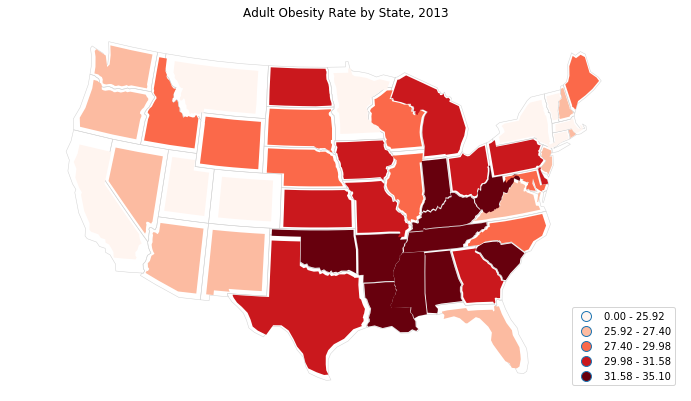

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
from quilt.data.ResidentMario import geoplot_data

obesity = geoplot_data.obesity_by_state()
contiguous_usa = gpd.read_file(geoplot_data.contiguous_usa())
contiguous_usa['State'] = [
    'Minnesota', 'Montana', 'North Dakota', 'Idaho', 'Washington', 'Arizona',
    'California', 'Colorado', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Wyoming',
    'Arkansas', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota',
    'Louisiana', 'Texas', 'Connecticut', 'Massachusetts', 'New Hampshire',
    'Rhode Island', 'Vermont', 'Alabama', 'Florida', 'Georgia', 'Mississippi',
    'South Carolina', 'Illinois', 'Indiana', 'Kentucky', 'North Carolina', 'Ohio',
    'Tennessee', 'Virginia', 'Wisconsin', 'West Virginia', 'Delaware', 'District of Columbia',
    'Maryland', 'New Jersey', 'New York', 'Pennsylvania', 'Maine', 'Michigan'
]
contiguous_usa['Obesity Rate'] = contiguous_usa['State'].map(
    lambda state: obesity.query("State == @state").iloc[0]['Percent']
)


# Plot the data.
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt


ax = gplt.cartogram(contiguous_usa, scale='Obesity Rate',
                    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
                    limits=(0.75, 1),
                    linewidth=0.5,
                    hue='Obesity Rate',
                    cmap='Reds',
                    k=5,
                    trace_kwargs={'linewidth': 0.5},
                    legend=True,
                    legend_kwargs={'loc': 'lower right'},
                    legend_var='hue',
                    figsize=(12, 12))

plt.title("Adult Obesity Rate by State, 2013")
plt.show()

In [2]:
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [3]:
contiguous_usa.head()

,id,adm1_code,State,geometry,Obesity Rate
0,0,USA-3514,Minnesota,"POLYGON ((-89.59940899999999 48.010274, -89.48...",25.5
1,1,USA-3515,Montana,"POLYGON ((-111.194189 44.561156, -111.291548 4...",24.6
2,2,USA-3516,North Dakota,"POLYGON ((-96.601359 46.351357, -96.5389080000...",31.0
3,4,USA-3518,Idaho,"POLYGON ((-111.049728 44.488163, -111.050245 4...",29.6
4,5,USA-3519,Washington,"POLYGON ((-116.998073 46.33017, -116.906528 46...",27.2


## Prefer Choropleth Chart instead of Cartogram of 50 States:

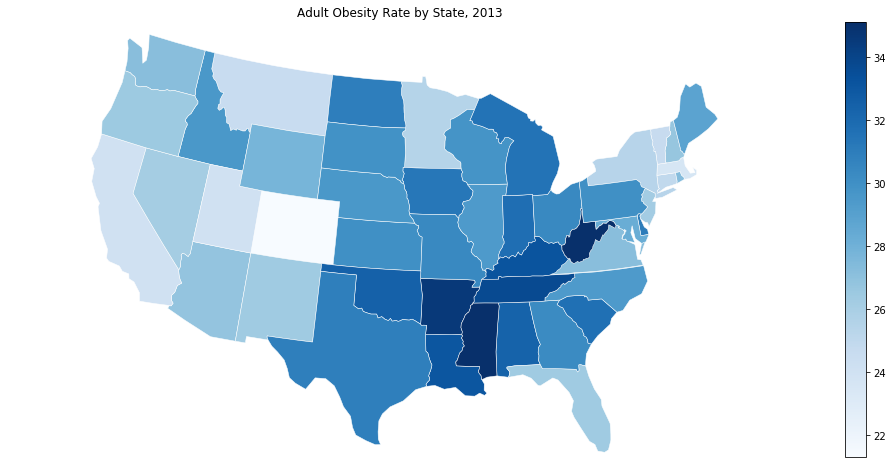

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
from quilt.data.ResidentMario import geoplot_data

obesity = geoplot_data.obesity_by_state()
contiguous_usa = gpd.read_file(geoplot_data.contiguous_usa())
contiguous_usa['State'] = [
    'Minnesota', 'Montana', 'North Dakota', 'Idaho', 'Washington', 'Arizona',
    'California', 'Colorado', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Wyoming',
    'Arkansas', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota',
    'Louisiana', 'Texas', 'Connecticut', 'Massachusetts', 'New Hampshire',
    'Rhode Island', 'Vermont', 'Alabama', 'Florida', 'Georgia', 'Mississippi',
    'South Carolina', 'Illinois', 'Indiana', 'Kentucky', 'North Carolina', 'Ohio',
    'Tennessee', 'Virginia', 'Wisconsin', 'West Virginia', 'Delaware', 'District of Columbia',
    'Maryland', 'New Jersey', 'New York', 'Pennsylvania', 'Maine', 'Michigan'
]
contiguous_usa['Obesity Rate'] = contiguous_usa['State'].map(
    lambda state: obesity.query("State == @state")['Percent'].iloc[0]
)


# Plot the data.
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt


ax = gplt.choropleth(contiguous_usa, hue=contiguous_usa['Obesity Rate'], projection=gcrs.AlbersEqualArea(),
                     cmap='Blues', linewidth=0.5, edgecolor='white', k=None, figsize=(20, 8), legend=True)

plt.title("Adult Obesity Rate by State, 2013")
plt.show()

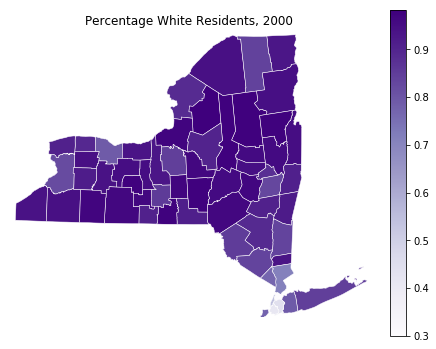

In [8]:
import geopandas as gpd
from quilt.data.ResidentMario import geoplot_data

census_tracts = gpd.read_file(geoplot_data.ny_census_partial())
percent_white = census_tracts['WHITE'] / census_tracts['POP2000']


# Plot the data.
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt

gplt.choropleth(census_tracts, hue=percent_white, projection=gcrs.AlbersEqualArea(),
                cmap='Purples', linewidth=0.5, edgecolor='white', k=None, legend=True)
plt.title("Percentage White Residents, 2000")
plt.show()

In [2]:
census_tracts.head()

,id,POP2000,WHITE,geometry
0,0,111931,105782,"POLYGON ((-74.712396 44.953008, -74.7111320000..."
1,1,79894,74562,"POLYGON ((-74.025026 44.980036, -74.0274011055..."
2,2,51134,42970,"POLYGON ((-74.025026 44.980036, -74.021078 44...."
3,3,38851,36848,"POLYGON ((-73.46411999999999 44.5354, -73.4649..."
4,4,111738,99118,POLYGON ((-75.86007064557869 44.40327395405457...


In [4]:
census_tracts.shape

(67, 4)

In [48]:
percent_white[:10]

0    0.945064
1    0.933262
2    0.840341
3    0.948444
4    0.887057
5    0.981703
6    0.977319
7    0.978332
8    0.949723
9    0.974756
dtype: float64